# Frequentist inference  (Part A) 

## 1. Introduction (learning objectives):

This project is a hypotheis testing case study using **Frequentist inference**. However, the whole project will be divied into two parts (because the first part has been fomrtted to teach the few basic concepts of Frequentist inference and the second part is a case study on a hospital charges with and without insurance). So, the two aprts are as follows:

* Part-A: Discussion on few statistical concepts related to Frquentist inference and the associated methods in Python
* Part-B: Use of Frequentist inference for a real world application: Hypothesis testing on "hospital charges with and without insurance"

Note: The discussion on the concepts have been carried out here in detail refering to a book ("The Art of Statistics" written by Professor Spiegelhalter).

Frequentist inference is the process of deriving conclusions about an underlying distribution via observation data. 

In Part-A, we'll use/write few Python codes to derive following statistical concepts: 
* _Z_-statistic
* _t_-statistic
* Difference and relationship between _Z_- and _t_-statistic 
* Central Limit Theorem, including its assumptions and consequences
* Estimation of population mean and standard deviation from a sample
* Concept of a sampling distribution of a test statistic (particularly for the mean)
* Combining these concepts to calculate confidence interval

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

## 2. Sampling from a normal distribution

First, let's explore the way we can generate the normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community to work on normal distribution, there is also another Python package called [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html). For this project, we'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete our work. Also, we'll proceed in a Question-Answer format.

In [1]:
import scipy.stats
from scipy.stats import norm, t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q1:__ **Call up the documentation for the `norm` function imported above. (Hint: scipy documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)). What do you mean by pdf method in scipy library?**

In [2]:
#help(norm)
norm?

Signature:       norm(*args, **kwds)
Type:            norm_gen
String form:     <scipy.stats._continuous_distns.norm_gen object at 0x0000014D076AF4D0>
File:            c:\users\dnaik\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py
Docstring:      
A normal continuous random variable.

The location (``loc``) keyword specifies the mean.
The scale (``scale``) keyword specifies the standard deviation.

As an instance of the `rv_continuous` class, `norm` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, loc=0, scale=1)

__Ans:__ pdf(x, loc = 0, scale = 1) <br><br>
**pdf:** Probablity density function.

__Q2:__ **Use the method that generates random variates drawing five samples from the standard normal distribution.** 

__Ans__: 

In [3]:
seed(47)
# Draw five sample data here
five_samples = norm.rvs(loc = 0, scale = 1, size = 5, random_state = 1)
print(five_samples)

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]


__Q3:__ **What is the mean of this sample? Is it exactly equal to the value we expected?** Note: The sample was drwan from the normal distribution. 

__Ans:__

In [4]:
# Calculate and print the mean here, hint: use np.mean()
np.mean(five_samples) 

np.float64(0.055371240983643745)

No, the mean value of the standard normal distribution and the expected value (from the five observations sample)  are not exactly same.

__Q4:__ **What is the standard deviation of these numbers? Let us calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$ (This is just the definition of **standard deviation**). Hint: np.sqrt() and np.sum() will be useful here and remember that NumPy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).**

__Ans:__

In [5]:
std_of_five_observation = np.sqrt((np.sum((five_samples-np.mean(five_samples))**2))/len(five_samples))
print("The standard deviation of the five observations:", std_of_five_observation )

The standard deviation of the five observations: 1.0175039388002434


Here we have calculated the actual standard deviation of a small data set (of size 5). But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die! 

In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$. 

__Q5:__ **If all we had to go on was our five samples, what would be our best estimate of the standard deviation (also called unbaised std)? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.**

__Ans:__

In [6]:
std_of_five_observation2 = np.sqrt((np.sum((five_samples-np.mean(five_samples))**2))/(len(five_samples)-1))
print("The standard deviation of the population (unbiased) calculated from five samples:", std_of_five_observation2)

The standard deviation of the population (unbiased) calculated from five samples: 1.137603987265565


__Q6:__ **Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?**

__Ans:__

In [7]:
#Standard deviation of five observations, with bessel's correction
np.std(five_samples, ddof = 1)

np.float64(1.137603987265565)

This returns the standard deviation of the five observations with Bessel's correction.

__Q7:__ **Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.**

__Ans:__

In [8]:
# Standard deviation of the population (if the population contains only 5 elements)
np.std(five_samples) # Here ddof = 0

np.float64(1.0175039388002434)

### Summary 

In this section, we intoduced scipy.stats package and used it to draw a small sample from the standard normal distribution. We calculated the average (the mean) of this sample and saw that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution). We used two ways of calculating the standard deviation; one using $n$ in the denominator and the other using $n-1$ (Bessel's correction). We also saw which of these calculations np.std() performs by default and how to get it to generate the other.

The population standard deviation is traditionally written as $\sigma$ and the sample standard deviation as $s$. That means we have the sample standard deviation and the population standard deviation and they're not the same thing!

The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}
\end{equation}

If your dataset _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}
as you have complete, full knowledge of your population. 

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population. In this case, the standard deviation of your sample is biased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation.

We are doing great so far! Now let's dive deeper.

## 3. Sampling distributions and Central Limit Theorem

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics.<br><br>
If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of means. This is the **sampling distribution of the means**. **The Central Limit Theorem (CLT)** tells us that such a **distribution will approach a normal distribution as $n$ increases**. In the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the means and $\sigma$ is the standard deviation of the population. this $\sigma_{mean}$ is also called Standard Error (SE).

This is important because typically we are dealing with samples from population and all we know about the population is what we see in the sample. i.e from the sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values of the statitsics (for example mean) and then calculating the standard deviation of the distribution (SE), and so we are intrinsically interested in how these quantities vary across samples.

**This brings us to a fundamental question: _when we make some inference about a population based on our samples, how confident can we be that we've got it 'right'?_**

For this, we need to think about **estimates and confidence intervals**.

Now, the standard normal distribution (that we saw above, with its variance/std equal to one) would not be a great illustration of a key point. Instead, let's imagine we live in a town of 50,000 people and we know the height of everyone in this town. We will have 50,000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [9]:
seed(47)
pop_heights = norm.rvs(172, 5, size = 50000)

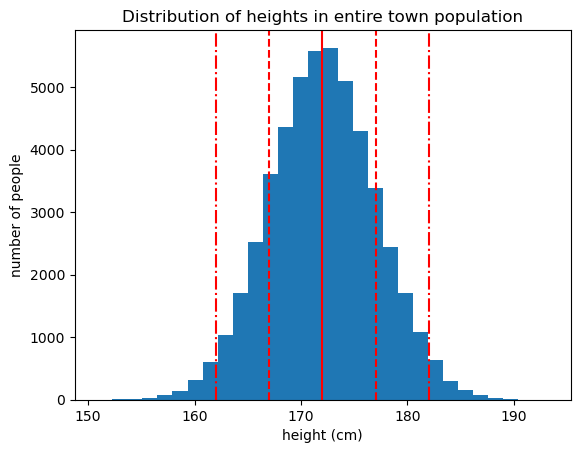

In [10]:
_ = plt.hist(pop_heights, bins = 30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50,000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [11]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [12]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

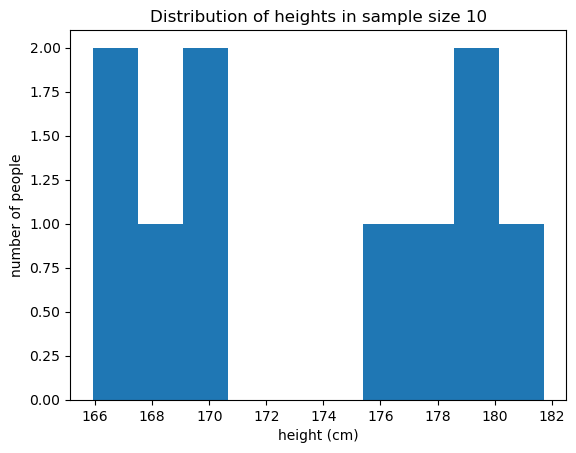

In [13]:
# Make a histgram plot of the 10 people's height
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

We see here, the sample distribution doesn't resemble with the population distribution. let us see what is the mean of the sample?

In [14]:
np.mean(daily_sample1)

np.float64(173.47911444163503)

And if we went out and repeat this experiment?

In [15]:
daily_sample2 = townsfolk_sampler(10)

In [16]:
np.mean(daily_sample2)

np.float64(173.7317666636263)

__Q8:__ **Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.**

__Ans:__

In [17]:
seed(47)
# Generate samples for 366 (or 365) days and take the mean of each sample 
samples_366_size_10 = [np.mean(townsfolk_sampler(10)) for i in range(366)]

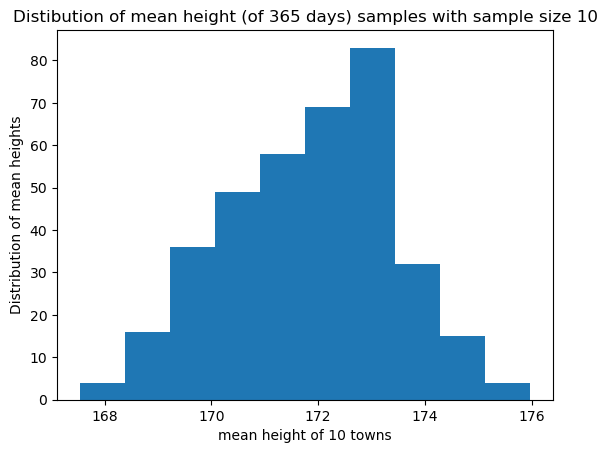

In [18]:
plt.hist(samples_366_size_10, bins = 10)
plt.xlabel('mean height of 10 towns')
plt.ylabel('Distribution of mean heights')
plt.title('Distibution of mean height (of 365 days) samples with sample size 10')
plt.show()

The above is the distribution of the means of samples of size 10 taken from our population. **The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation (also called Standard Error) will be $\sigma / \sqrt n$,**.

__Q9:__ **Verify the above results from the CLT.**

__Ans:__

In [19]:
population_mean_from_pop_heights = np.mean(pop_heights) # population mean
population_mean_from_CLT_10 = np.mean(samples_366_size_10)
print('Population mean calculated from population(pop_height):', round(population_mean_from_pop_heights, 1))
print('Mean calculated from the distribution of sample means with sample size 10:', round(population_mean_from_CLT_10, 1)) 

Population mean calculated from population(pop_height): 172.0
Mean calculated from the distribution of sample means with sample size 10: 171.9


In [20]:
samples_std_with_size10 = round(np.std(samples_366_size_10), 2) # Std of samples distribution with size 10
print('Samples distribution std(SE) with sample size 10:', samples_std_with_size10)

Samples distribution std(SE) with sample size 10: 1.58


**Ans: Here, the population mean and the mean obtained from the distribution of mean of the samples of size 10, both are almost same.** <br><br>
**The standard deviation of the samples mean distribution is found to be 1.58** 

Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

__Q10:__ **Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year)! Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.**

__Ans:__

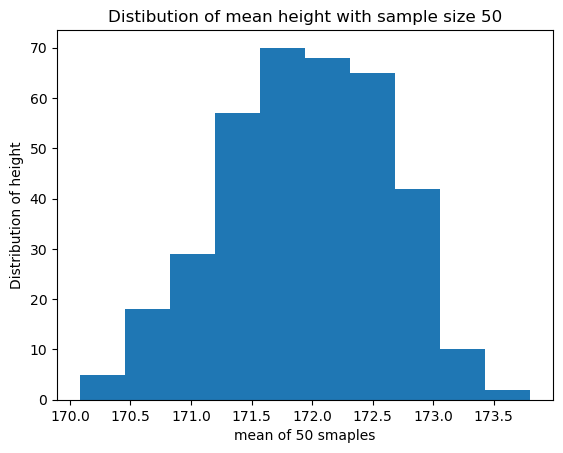

In [21]:
seed(47)
# calculate daily means from the larger sample size here
dist_with_sample_size_50 = [np.mean(townsfolk_sampler(50)) for i  in range(366)]
plt.hist(dist_with_sample_size_50, bins = 10)
plt.xlabel('mean of 50 smaples')
plt.ylabel('Distribution of height')
plt.title('Distibution of mean height with sample size 50')
plt.show()

In [22]:
population_mean_from_pop_heights = np.mean(pop_heights) # population mean
population_mean_from_CLT_50 = np.mean(dist_with_sample_size_50)
print('Population mean calculated from population(pop_height):', round(population_mean_from_pop_heights, 1))
print('Mean calculated from the distribution of sample means with sample size 10:', round(population_mean_from_CLT_50, 1)) 

Population mean calculated from population(pop_height): 172.0
Mean calculated from the distribution of sample means with sample size 10: 171.9


# Calculation of samples' mean distribution's std 

In [23]:
std_sample_means_50_calculated_from_popul = round(np.std(pop_heights)/np.sqrt(50), 2)
std_of_sample_means_50_calculated_from_dist= np.std(dist_with_sample_size_50)
print('The std of the sample means distribution calculated from population (also called SE):', round(std_sample_means_50_calculated_from_popul,2))
print('The std of the sample means distribution (with sample size 50) calculated from distribution (also called SE):', round(std_sample_means_50_calculated_from_popul,2))

The std of the sample means distribution calculated from population (also called SE): 0.71
The std of the sample means distribution (with sample size 50) calculated from distribution (also called SE): 0.71


**Ans:** Here, the distribution of samples mean (with sample size 50) is narrower (more consistent) as compared to the earlier case (where sample size was 10)

**The mean of the above distribution is also equal to the population mean.**<br> **The std calculated using population directly and from sample means distribution are also found to be equal(= 0.71).**

What we've seen so far, is that we can estimate population parameters from samples (drawn from the population), and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.

### Normality testing time!

All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've  seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but we still have to estimate them somehow. If we want to make inferences to conclusions like "this observation is unusual" or "my population mean has changed" then we need to have some idea of what the underlying distribution is so we can calculate relevant probabilities. In frequentist inference, we use the formulae above to deduce these population parameters. 

Let us recall some basic properties of the standard normal distribution, such as that about 68% of observations are within (+/-) 1 standard deviation of the mean. 

__Q11:__ **Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.**

__A:__

In [25]:
import matplotlib
img = matplotlib.image.imread('Fig_normal_distribution.pptx')
matplotlib.pyplot.figure(figsize = (15, 10))
matplotlib.pyplot.imshow(img, extent = [-10, 10, 2.0, 10])

UnidentifiedImageError: cannot identify image file 'Fig_normal_distribution.pptx'

Calculating this probability involved calculating the area under the curve from the value of 1 and below. To put it in mathematical terms, we need to *integrate* the probability density function. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above). One way to do this is to look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q12:__ **Use the cdf() function to answer the question above again and verify you get the same answer.**

__Ans:__

In [ ]:
norm.cdf(1, loc = 0, scale = 1)

**Ans:** **The area under the curve in a Standard Normal Distribution upto 1 is 0.84 as calculated by two different methods (from z table and using cdf function in scipy.stats)**

__Q13:__ **Using our knowledge of the population parameters for our townsfolks' heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.**

__Ans:__

In [ ]:
probability_height_177cm_less = 0.50 + 0.34    # Calculated from z-table, mean = 172 cm, std = 5 cm
print('Probability of a person having height 177 cm or less (as calculated using z-table):', probability_height_177cm_less)

In [ ]:
seed(12)
print("The probability of a person having height 177 cm or less( as calculted using cdf method from scipy.stats):", norm.cdf(177, loc = 172, scale = 5))

__Q14:__ **Turning this question around — suppose we randomly pick one person and measure their height and find they are 2.00 m tall. How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.** 

__Ans:__

In [ ]:
probability_200cm_and_above = 1 - norm.cdf(200, loc = 172, scale = 5)
print("Probability of observing a person 200 cm or above:", probability_200cm_and_above)

**The probability of obtaining the person 2.00 m and above is very very less as calculted above.** 

What we've just done is calculate the ***p-value*** of the observation of someone 2.00 m tall. We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value.

We're about to come to a pinch, though. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation. 

This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation. 

In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain. 

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_. This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

__Q15:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use the random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std 
* Calculate the (95%) (use the exact critial z value to 2 decimal places) - or use norm.ppf() Recall that the ***margin of error*** is mentioned on p. 189 of the *AoS* and discussed in depth in that chapter). 
* Calculate the 95% Confidence Interval of the mean  
* Does this interval include the true population mean?

__A:__

In [ ]:
seed(47)
# take your sample now
#sample = np.random.normal(loc = 172, scale = 5, size = 50) # Here 50 observations have been generated with given loc and std 
sample = townsfolk_sampler(50) # Here 50 observations out of pop_hights have been taken
sample_mean = np.mean(sample) 
sample_std = np.std(sample, ddof = 1)
print('Sample mean calculated from 50 random sample:', sample_mean)
print('Sample std calculated from 50 random sample:', sample_std) 
population_std = 5

In [ ]:
import math
critical_value_95 = norm.ppf(0.975) # Critical value of 95% confidence interval
margin_of_error = critical_value_95 * population_std/math.sqrt(len(sample)) # Margin of error of 95% confidence interval
print('Critical value for 95% confidence interval:',critical_value_95)
print('Margine of error:', margin_of_error)

In [ ]:
import scipy.stats
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

In [ ]:
lower_value = sample_mean - margin_of_error
upper_value = sample_mean + margin_of_error
print(lower_value)
print(upper_value)

__Q16:__ **Above, we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?**

__Ans:__ We are taking the std of the population which is in general not known.

__Q17:__ **Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().**

__Ans:__ 

In [ ]:
# For this alpha = 0.05, df = 49
t_value =  t.ppf(q = 1-0.05/2, df = 49 ) 
t_value

In [ ]:
margin_of_error_using_t = t_value * population_std/math.sqrt(len(sample))
margin_of_error_using_t

In [ ]:
lower_value_using_t = np.mean(sample) - margin_of_error_using_t
upper_value_using_t = np.mean(sample) + margin_of_error_using_t
print(lower_value_using_t)
print(upper_value_using_t)

This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.

**Yes, this contains the true population mean.**

## 4. Learning outcomes

Having completed this project notebook, you now have hands-on experience:
* sampling and calculating probabilities from a normal distribution
* identifying the correct way to estimate the standard deviation of a population (the population parameter) from a sample
* with sampling distribution and now know how the Central Limit Theorem applies
* with how to calculate critical values and confidence intervals